In [8]:
import pandas as pd #used for data manipulation and analysis. Dataframe creation.
import seaborn as sns #for plotting graphs
import numpy as np#used for scientific computation
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [6]:
wineData = pd.read_csv('winequality-red.csv')
#downloaded from UCI ML repository

For regression techniques, instead of evaluating precision, accuracy and AUC, we will evaluate the r2 score of the prediction. The r2 score is also often called "coefficient of determination". The closer the r2 score to 1.0, the better.

In [7]:
X = wineData[wineData.columns[0:11]].values
y = wineData['quality'].values.astype(np.float)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (1119, 11)
y train size:  (1119,)
X test size:  (480, 11)
y test size:  (480,)


# Random Forest Regressor

Unlike RandomForestClassifier, RandomForestRegressor by default searches the full set of features at each split. We will use GridSearchCV to search for an optimal combination of max_features, max_depth and min_samples_leaf.

In [13]:
tuned_parameters = {'n_estimators':[500],'n_jobs':[-1], 'max_features': [0.5,0.6,0.7,0.8,0.9,1.0], 
                    'max_depth': [16,20,24],'min_samples_leaf':[1,10,100],'random_state':[0]} 

reg = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='r2')
reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [500], 'n_jobs': [-1], 'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'max_depth': [16, 20, 24], 'min_samples_leaf': [1, 10, 100], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [15]:
from sklearn.metrics import r2_score
print('The best model is: ', reg.best_params_)
print('This model produces a mean cross-validated score (r2) of', reg.best_score_)
y_pred = reg.predict(X_test)
print("The r2 score on the test set is: ", r2_score(y_test, y_pred))

The best model is:  {'max_depth': 20, 'max_features': 0.6, 'min_samples_leaf': 1, 'n_estimators': 500, 'n_jobs': -1, 'random_state': 0}
This model produces a mean cross-validated score (r2) of 0.45284972761807735
The r2 score on the test set is:  0.48068632069017303


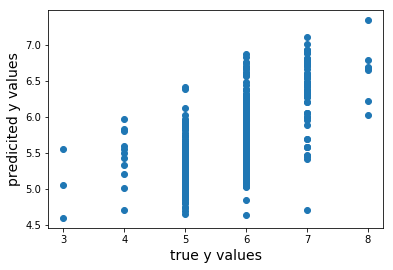

In [16]:
plt.plot(y_test,y_pred, linestyle='',marker='o')
plt.xlabel('true y values', fontsize = 14)
plt.ylabel('predicited y values', fontsize = 14)
plt.show()

The Random Forest regressor model does not give a satisfactory r2 score value. In future, we plan to study BaggingRegressors and ExtraTree Regressors and compare their performance with our RandomForest Regressor.